Restricted Boltzmann Machine (RBM) - Test 2

In [1]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torch


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

100.0%
100.0%
100.0%
100.0%


In [6]:
from RBM import RBM

import matplotlib.pyplot as plt
import pandas as pd

epochs = 10

for v_train, _ in train_loader:
    v_initial = v_train

In [7]:
examples = []
details = []
for cd in [1, 5, 10]:
    model = RBM(28*28, 500, category='p', cd_k=cd)

    print(f"Initializing RBM's Training")
    for ep in range(epochs):
        training_loss = 0
        batches = 0
        for v_train, _ in train_loader:
            loss = model.contrastive_divergence(v_train)
            training_loss += loss
            batches += 1

        v_recon = model.reconstruction(v_initial)

        examples.append({'cd': cd, 'epoch': ep, 'recon': v_recon.view(-1, 1, 28, 28)})

        details.append({'cd': cd, 'epoch': ep, 'loss': training_loss/batches})
        print(f'CD Iterations {cd} - Epoch {ep + 1} - Loss {round(training_loss/batches, 3)}')

    examples.append({'cd': cd, 'epoch': ep + 1, 'recon': torch.bernoulli(v_initial)})

df_details = pd.DataFrame(details)

Initializing RBM's Training
CD Iterations 1 - Epoch 1 - Loss 0.336
CD Iterations 1 - Epoch 2 - Loss 0.301
CD Iterations 1 - Epoch 3 - Loss 0.289
CD Iterations 1 - Epoch 4 - Loss 0.283
CD Iterations 1 - Epoch 5 - Loss 0.279
CD Iterations 1 - Epoch 6 - Loss 0.277
CD Iterations 1 - Epoch 7 - Loss 0.275
CD Iterations 1 - Epoch 8 - Loss 0.273
CD Iterations 1 - Epoch 9 - Loss 0.271
CD Iterations 1 - Epoch 10 - Loss 0.27
Initializing RBM's Training
CD Iterations 5 - Epoch 1 - Loss 0.39
CD Iterations 5 - Epoch 2 - Loss 0.345
CD Iterations 5 - Epoch 3 - Loss 0.337
CD Iterations 5 - Epoch 4 - Loss 0.331
CD Iterations 5 - Epoch 5 - Loss 0.328
CD Iterations 5 - Epoch 6 - Loss 0.325
CD Iterations 5 - Epoch 7 - Loss 0.323
CD Iterations 5 - Epoch 8 - Loss 0.321
CD Iterations 5 - Epoch 9 - Loss 0.319
CD Iterations 5 - Epoch 10 - Loss 0.317
Initializing RBM's Training
CD Iterations 10 - Epoch 1 - Loss 0.429
CD Iterations 10 - Epoch 2 - Loss 0.379
CD Iterations 10 - Epoch 3 - Loss 0.369
CD Iterations 10

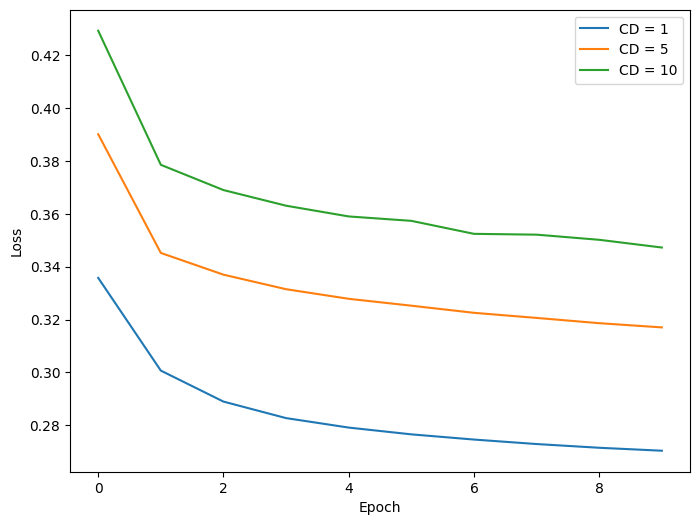

In [11]:
plt.figure(figsize=(8, 6))
for cd in [1, 5, 10]:
    plt.plot(df_details[df_details['cd']==cd]['epoch'], df_details[df_details['cd']==cd]['loss'], label=f'CD = {cd}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Teste no MNIST

In [12]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

import torchvision.transforms as transforms
import torch


transform = transforms.Compose([transforms.ToTensor()])
train_dataset = MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

In [13]:
from RBM import RBM

import matplotlib.pyplot as plt
import pandas as pd

epochs = 10

for v_train, _ in train_loader:
    v_initial = v_train

In [14]:
examples = []
details = []
for cd in [1, 5, 10]:
    model = RBM(28*28, 500, category='p', cd_k=cd)

    print(f"Initializing RBM's Training")
    for ep in range(epochs):
        training_loss = 0
        batches = 0
        for v_train, _ in train_loader:
            loss = model.contrastive_divergence(v_train)
            training_loss += loss
            batches += 1

        v_recon = model.reconstruction(v_initial)

        examples.append({'cd': cd, 'epoch': ep, 'recon': v_recon.view(-1, 1, 28, 28)})

        details.append({'cd': cd, 'epoch': ep, 'loss': training_loss/batches})
        print(f'CD Iterations {cd} - Epoch {ep + 1} - Loss {round(training_loss/batches, 3)}')

    examples.append({'cd': cd, 'epoch': ep + 1, 'recon': torch.bernoulli(v_initial)})

df_details = pd.DataFrame(details)

Initializing RBM's Training
CD Iterations 1 - Epoch 1 - Loss 0.151
CD Iterations 1 - Epoch 2 - Loss 0.102
CD Iterations 1 - Epoch 3 - Loss 0.09
CD Iterations 1 - Epoch 4 - Loss 0.084
CD Iterations 1 - Epoch 5 - Loss 0.081
CD Iterations 1 - Epoch 6 - Loss 0.078
CD Iterations 1 - Epoch 7 - Loss 0.076
CD Iterations 1 - Epoch 8 - Loss 0.075
CD Iterations 1 - Epoch 9 - Loss 0.074
CD Iterations 1 - Epoch 10 - Loss 0.073
Initializing RBM's Training
CD Iterations 5 - Epoch 1 - Loss 0.223
CD Iterations 5 - Epoch 2 - Loss 0.143
CD Iterations 5 - Epoch 3 - Loss 0.127
CD Iterations 5 - Epoch 4 - Loss 0.119
CD Iterations 5 - Epoch 5 - Loss 0.115
CD Iterations 5 - Epoch 6 - Loss 0.113
CD Iterations 5 - Epoch 7 - Loss 0.11
CD Iterations 5 - Epoch 8 - Loss 0.108
CD Iterations 5 - Epoch 9 - Loss 0.107
CD Iterations 5 - Epoch 10 - Loss 0.105
Initializing RBM's Training
CD Iterations 10 - Epoch 1 - Loss 0.276
CD Iterations 10 - Epoch 2 - Loss 0.185
CD Iterations 10 - Epoch 3 - Loss 0.163
CD Iterations 10

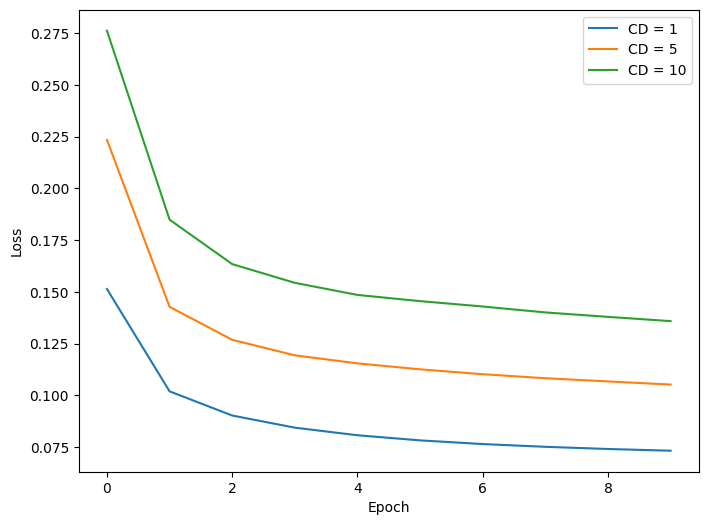

In [15]:
plt.figure(figsize=(8, 6))
for cd in [1, 5, 10]:
    plt.plot(df_details[df_details['cd']==cd]['epoch'], df_details[df_details['cd']==cd]['loss'], label=f'CD = {cd}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()